In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.fft
import matplotlib.ticker as ticker

A0 = 3
f0 = 40
beta = 150
t0 = 0.2
fi = 0
T = 0.5
N = int((0.5 - 0) / 0.002)
sigx = A0/50
epsi = np.random.normal(0, sigx, N)
ti = [0]
si = [0]

In [ ]:
for i in range(1, N):
  ti += [0 + i*0.002]
  si += [A0*ti[i]*np.exp(-(beta) * (ti[i]) ** 2) * np.sin(2*m.pi*f0*(ti[i]) + fi)]

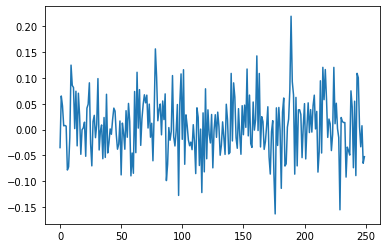

In [ ]:
plt.plot(epsi)

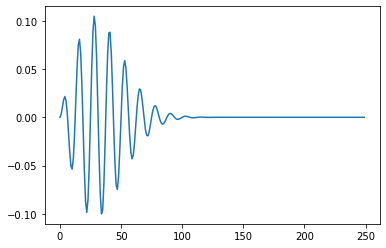

In [ ]:
plt.plot(si) #чистый сигнал

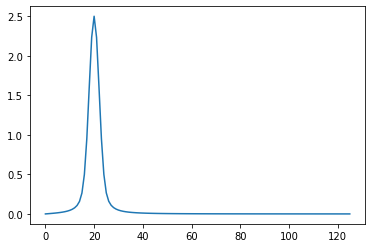

In [ ]:
ACHsi = scipy.fft.rfft(si) #описание чистого сигнала в частотной области
plt.plot(abs(ACHsi))

In [ ]:
f1 = 20
f2 = 31
x = epsi + si 
ACHx = scipy.fft.rfft(x)

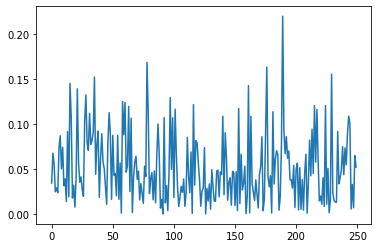

In [ ]:
plt.plot(abs(x)) # сигнал с шумом

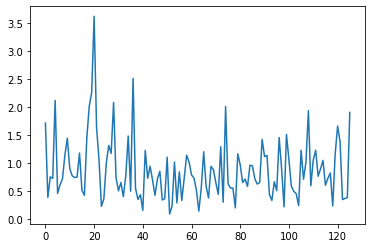

In [ ]:
plt.plot(abs(ACHx)) # описание сигнала с шумом в частотной области

In [ ]:
# зададим характеристику фильтра
h = np.zeros(N-1)
for i in range(N-1):
  h[i] = (1/(2*m.pi*(i+1)*0.002)) * (m.sin(2*m.pi*f1*(i+1)*0.002) + m.sin(2*m.pi*f2*(i+1)*0.002))/(1-4*((i+1) ** 2) * (0.002 ** 2) * (f2-f1) ** 2)

In [ ]:
print(len(h))

249


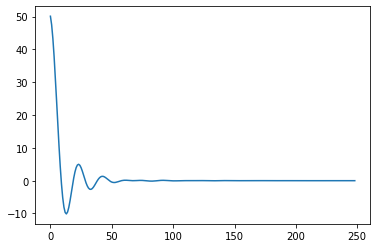

In [ ]:
plt.plot(h)

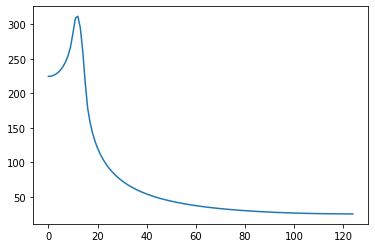

In [ ]:
ACHh = scipy.fft.rfft(h)
plt.plot(abs(ACHh))

In [ ]:
Y = np.zeros(N-1)
for i in range(N-1):
  for j in range(N-1):
    if (i-j>0):
      Y[i] += h[j]*x[i-j]

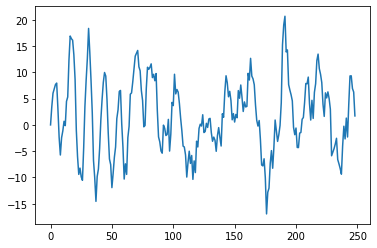

In [ ]:
plt.plot(Y)

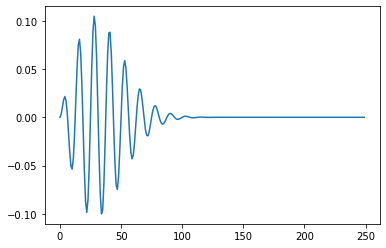

In [ ]:
plt.plot(si) #чистый сигнал

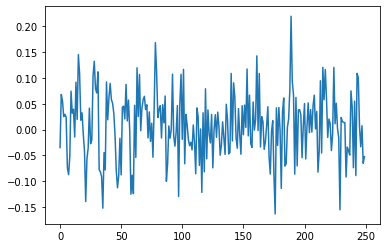

In [ ]:
plt.plot(x) #входной сигнал